In [14]:
# import warnings
# warnings.simplefilter('ignore', UserWarning)

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
# import IProgress

# Sample data: Airline passengers
df = pd.read_csv('./data/BTCUSDT_1h.csv')
# df.columns = ["ds", "y"]  # Prophet requires the column names to be ds and y

data = pd.DataFrame()
# data['ds'] = pd.to_datetime(df['date'])
data['ds'] = pd.to_datetime(df['date']).dt.tz_localize(None)
data['y'] = df['close']

# print(df.tail())
print(data.tail(10))
data = data.tail(100)

                       ds        y
11339 2022-10-14 10:00:00  19678.7
11340 2022-10-14 11:00:00  19588.3
11341 2022-10-14 12:00:00  19792.0
11342 2022-10-14 13:00:00  19657.5
11343 2022-10-14 14:00:00  19456.9
11344 2022-10-14 15:00:00  19352.9
11345 2022-10-14 16:00:00  19297.0
11346 2022-10-14 17:00:00  19355.1
11347 2022-10-14 18:00:00  19206.8
11348 2022-10-14 19:00:00  19160.0


In [ ]:
# 2. Preprocess the data: Prophet expects a dataframe with two columns, named 'ds' and 'y'.
# Assuming 'timestamp' is the time column and 'close' is the closing price
# data.rename(columns={'timestamp': 'ds', 'close': 'y'}, inplace=True)


In [15]:
# Model and forecast with Prophet
model = Prophet()
model.fit(data)


08:56:20 - cmdstanpy - INFO - Chain [1] start processing


08:56:20 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Make future dataframe for next 10 hours
future = model.make_future_dataframe(periods=10, freq='H')

forecast = model.predict(future)


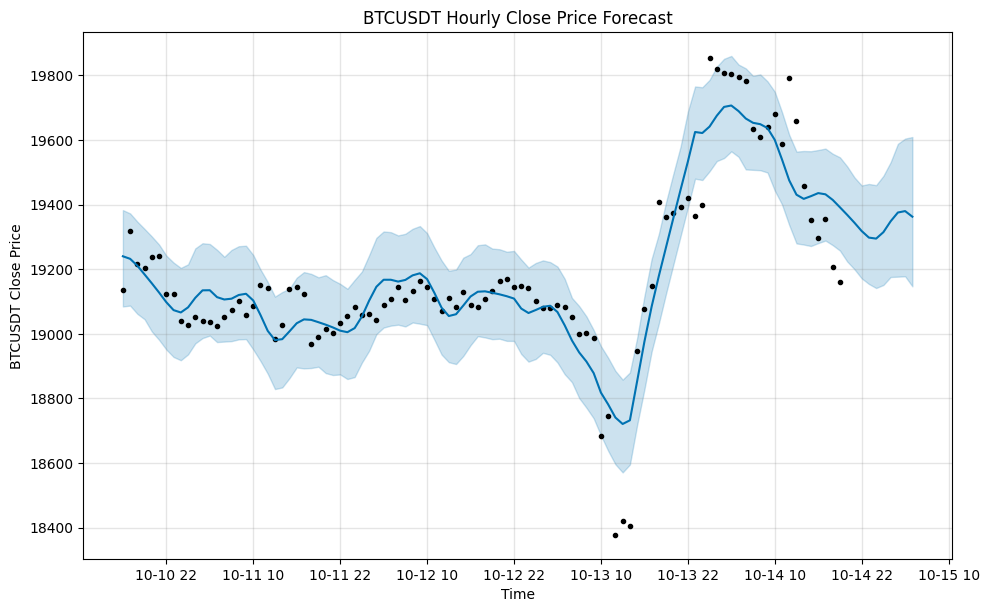

In [17]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('BTCUSDT Hourly Close Price Forecast')
plt.xlabel('Time')
plt.ylabel('BTCUSDT Close Price')
plt.show()

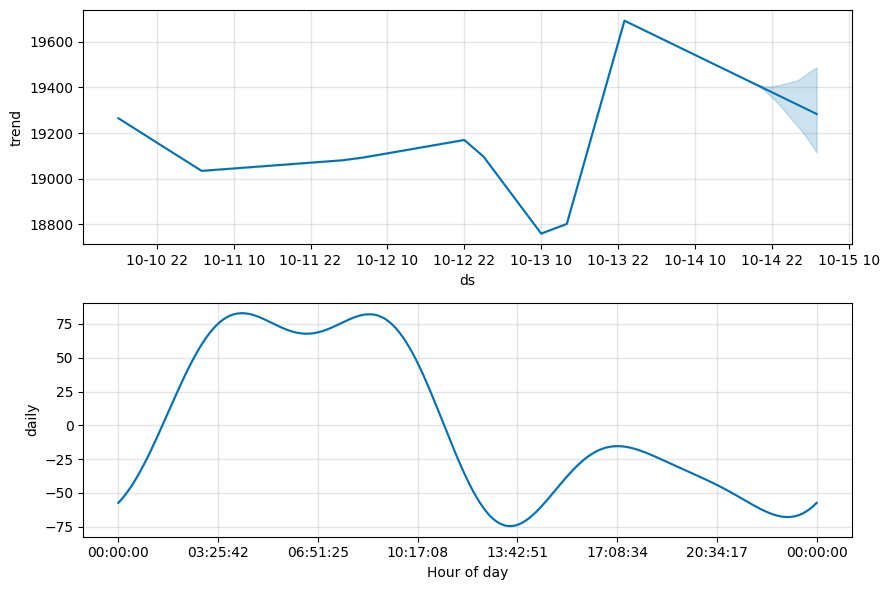

In [24]:
fig2 = model.plot_components(forecast)
plt.show()

In [23]:
print(forecast.tail(15))

                     ds         trend    yhat_lower    yhat_upper  \
95  2022-10-14 15:00:00  19474.333653  19271.545601  19564.922540   
96  2022-10-14 16:00:00  19460.716829  19280.528739  19568.736697   
97  2022-10-14 17:00:00  19447.100005  19288.426288  19573.098633   
98  2022-10-14 18:00:00  19433.483182  19274.300317  19557.213964   
99  2022-10-14 19:00:00  19419.866358  19257.475839  19546.021469   
100 2022-10-14 20:00:00  19406.249534  19223.764929  19518.061630   
101 2022-10-14 21:00:00  19392.632711  19199.801267  19484.077148   
102 2022-10-14 22:00:00  19379.015887  19171.495833  19458.883871   
103 2022-10-14 23:00:00  19365.399063  19154.116711  19463.648894   
104 2022-10-15 00:00:00  19351.782239  19141.526634  19459.870797   
105 2022-10-15 01:00:00  19338.165416  19151.015206  19488.713453   
106 2022-10-15 02:00:00  19324.548592  19175.615290  19530.985804   
107 2022-10-15 03:00:00  19310.931768  19176.711031  19587.814574   
108 2022-10-15 04:00:00  19297.314

Analyzing the risk of investing in an asset, like BTCUSDT, over the next 10 hours involves considering several factors. Here are some steps and considerations:

1. **Volatility Analysis**: 
   - Measure the standard deviation of the hourly returns for the most recent period to get an idea of the expected volatility.
   - Using the Prophet model's forecast, check the predicted uncertainty intervals (usually provided as `yhat_lower` and `yhat_upper` in the forecast dataframe). A wider range would imply higher uncertainty.

2. **News & Events**:
   - Keep abreast of any upcoming significant events or announcements that could affect the cryptocurrency market. This includes regulatory news, technological advancements or issues, macroeconomic factors, etc.

3. **Historical Behavior**:
   - Analyze the behavior of BTCUSDT during similar past periods. For example, if there was a sudden spike in the last hour, look at historical data to see how BTC behaved after similar spikes.

4. **Market Sentiment**:
   - Monitor social media, news, and other platforms to gauge the sentiment of the general public and traders. Tools like sentiment analysis can be used to process large amounts of textual data to derive sentiment scores.

5. **Liquidity Analysis**:
   - Ensure that there's enough trading volume and liquidity if you plan to make a large trade, so you can enter or exit your position without causing significant price impact.

6. **Diversification**:
   - Instead of putting all your investment into BTCUSDT, consider diversifying across multiple assets to spread the risk.

7. **Use of Technical Indicators**:
   - Analyze using technical indicators like Moving Averages, RSI, MACD, etc. to get more insights into potential price movements.

8. **Risk Management Tools**:
   - Consider setting stop-loss or take-profit levels. This way, if the price goes against your prediction, you can limit your losses.

9. **External Economic Factors**:
   - Keep in mind the global economic situation, as cryptocurrencies can be influenced by broader market forces, changes in fiat currencies, interest rates, etc.

10. **Regulatory Environment**:
   - Stay updated with any potential regulatory changes in major markets that could impact cryptocurrency trading and sentiment.

Remember, investing in cryptocurrencies is inherently risky, and prices can be extremely volatile. It's crucial to only invest what you're willing to lose, and if you're uncertain, consider consulting with a financial advisor. The steps above are general guidelines, and you should adapt them based on your individual risk tolerance and investment goals.

1. **Loading Data & Calculating Returns**:
First, we'll calculate hourly returns from the closing prices:

In [29]:
import pandas as pd

# Load the data
data = df.tail(100).copy()  # Using only the last 100 periods

# Calculate returns as: return = (current_close - previous_close) / previous_close
data.loc[:, 'returns'] = data['close'].pct_change().dropna()
# data['returns'] = data['close'].pct_change()
data = data.dropna()

print(data.head())

                            date     open     high      low    close  \
11250  2022-10-10 17:00:00+00:00  19136.8  19355.5  19115.2  19317.2   
11251  2022-10-10 18:00:00+00:00  19317.1  19324.6  19177.9  19216.6   
11252  2022-10-10 19:00:00+00:00  19216.5  19257.6  19185.6  19204.9   
11253  2022-10-10 20:00:00+00:00  19205.0  19253.3  19204.9  19237.5   
11254  2022-10-10 21:00:00+00:00  19237.6  19279.9  19215.7  19240.0   

          volume   returns  
11250  39407.066  0.009422  
11251  26874.011 -0.005208  
11252  16033.224 -0.000609  
11253   7343.831  0.001697  
11254   6121.635  0.000130  


2. **Volatility Calculation**:
Next, we'll compute the standard deviation of the returns:

In [30]:
volatility = data['returns'].std()
annualized_volatility = volatility * (365**0.5)  # Assuming 365 days for annualization
print(f'Hourly Volatility: {volatility:.2%}')
print(f'Annualized Volatility: {annualized_volatility:.2%}')

Hourly Volatility: 0.58%
Annualized Volatility: 11.03%


3. **Interpreting Volatility**:
The output gives us the hourly and annualized volatility:

- A high hourly volatility would indicate that the price of BTCUSDT is expected to fluctuate significantly within an hour. 
- The annualized volatility gives a perspective on the asset's volatility over a longer time frame, though remember this is a simplistic annualization just for reference.

4. **Predicted Volatility**:
If you're using Prophet's forecast, you can also gauge the expected volatility for the next 10 hours:

In [35]:
data = pd.DataFrame()
# data['ds'] = pd.to_datetime(df['date'])
data['ds'] = pd.to_datetime(df['date']).dt.tz_localize(None)
data['y'] = df['close']

data = data.tail(100)

In [36]:
# Forecast with Prophet as done previously
model = Prophet()
model.fit(data[['ds', 'y']])
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

# The difference between yhat_upper and yhat_lower can give an idea of the expected price range
forecast['predicted_volatility'] = (forecast['yhat_upper'] - forecast['yhat_lower']) / forecast['yhat']
forecast_volatility_next_10_hours = forecast['predicted_volatility'].tail(10).mean()

print(f'Predicted Volatility for next 10 hours: {forecast_volatility_next_10_hours:.2%}')

09:26:16 - cmdstanpy - INFO - Chain [1] start processing


09:26:16 - cmdstanpy - INFO - Chain [1] done processing


Predicted Volatility for next 10 hours: 1.78%


5. **Risk Assessment**:
Volatility, on its own, does not tell you whether the price will go up or down, only the magnitude of the expected price movement. A higher volatility means higher potential for both returns and losses. If the predicted volatility is significantly higher than recent volatility, this might signal increased uncertainty or potential large price movements in the next 10 hours.

It's essential to combine volatility analysis with other tools and information to make an informed investment decision.